# **TECNICATURA UNIVERSITARIA EN INTELIGENCIA ARTIFICIAL**  
## TRABAJO PRÁCTICO N° 2: MINERÍA DE DATOS  
### **INTEGRANTES:** Caballero, Franco - (C-7328/8) | Grimaldi, Damián - (G-5977/3)
### **Fecha Límite de Entrega:** 21/05/2025  
### **Semestre:** 1° Semestre 2025


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV


# Ejercicio 1. EDA Companias

**VARIABLES**

RyD_Spend -> Gasto en Investigación y Desarrollo (cantidad de dinero invertido)  
Administracion -> Gasto en Administración (cantidad de dinero invertido en funciones administrativas)  
MarketingSpend -> Gasto en Marketing (cantidad de dinero invertido en Marketing)     
State → Estado en el que opera la empresa (variable categórica que representa la localización geográfica dentro del país).

**TARGET**  
Profit -> Ganancias obtenidas ( ganancias netas de la empresa luego de los gastos)  


In [109]:
companias = pd.read_csv('1000_Companies.csv')
companias.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [110]:
# Podemos observar que no hay nulos
companias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [111]:
companias.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [112]:
# Podemos observar que hay una fila duplicada
companias[companias.duplicated() == True]

,RyD_Spend,Administration,MarketingSpend,State,Profit
755,84533.0,122941.3141,231885.6935,California,121248.7116


In [113]:
# Eliminamos la fila duplicada
companias.drop_duplicates(inplace=True)

## Gráficos

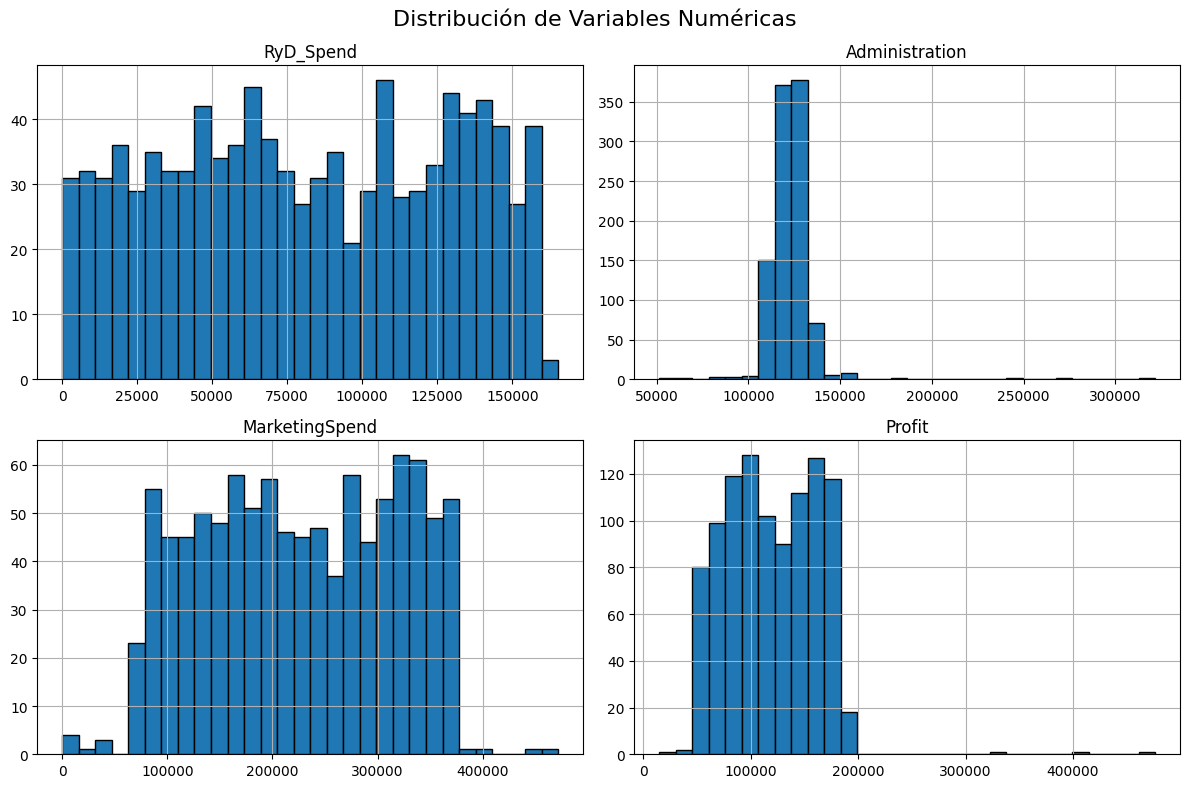

In [114]:
# Histograma de variables numéricas
num_vars = ['RyD_Spend', 'Administration', 'MarketingSpend', 'Profit']
companias[num_vars].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

Se puede observar que RyD_Spend y MarketingSpend tienen una distribución aproximadamente uniforme, mientras que Administration y Profit presentan una distribución sesgada a la derecha.  
Se observan distribuciones más dispersas en RyD y Marketing, mientras que Administración y Profit muestran concentraciones claras y valores extremos.

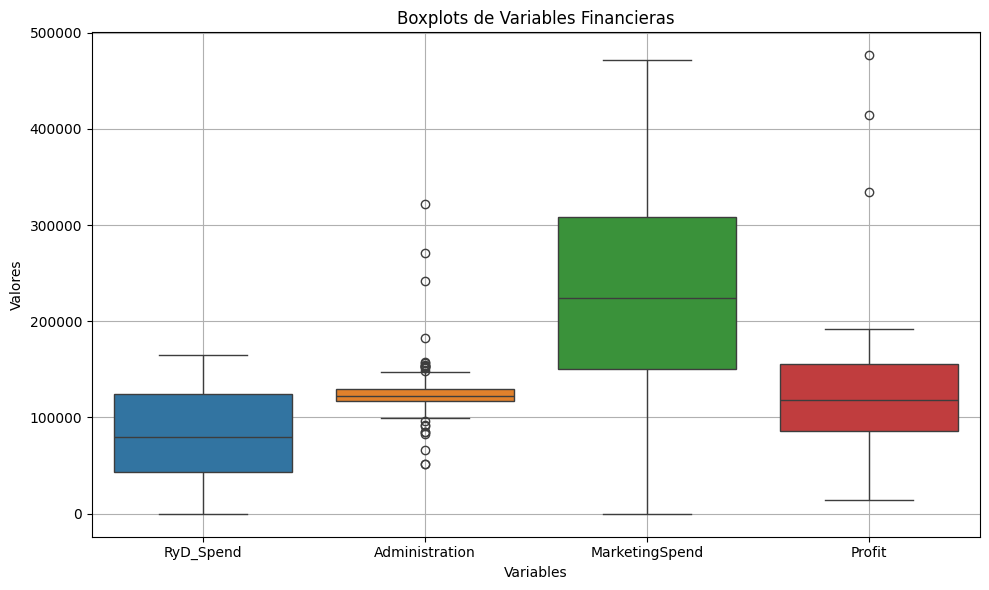

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=companias[num_vars])
plt.title('Boxplots de Variables Financieras')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.grid(True)
plt.tight_layout()
plt.show()

Se observan algunos outliers en Administration lo que sugiere que algunas empresas destinan significativamente más recursos administrativos que otras. También hay pocos outliers en Profit, indicando que unas pocas empresas logran un éxito financiero considerablemente mayor que el resto.

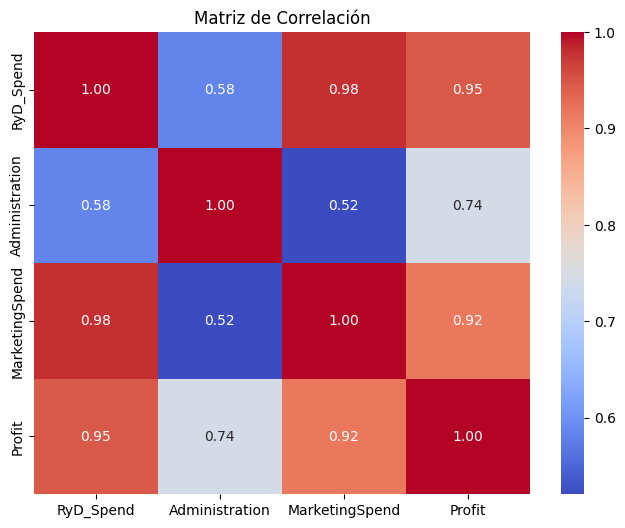

In [116]:
plt.figure(figsize=(8,6))
sns.heatmap(companias[num_vars].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


Podemos observar que la variable Profit presenta una alta correlación con todas las variables numéricas, destacándose especialmente con R&D Spend (0.95) y Marketing Spend (0.92), lo que indica que mayores inversiones en estas áreas están fuertemente asociadas con un mayor beneficio. La correlación con Administration también es positiva (0.74), aunque en menor medida.


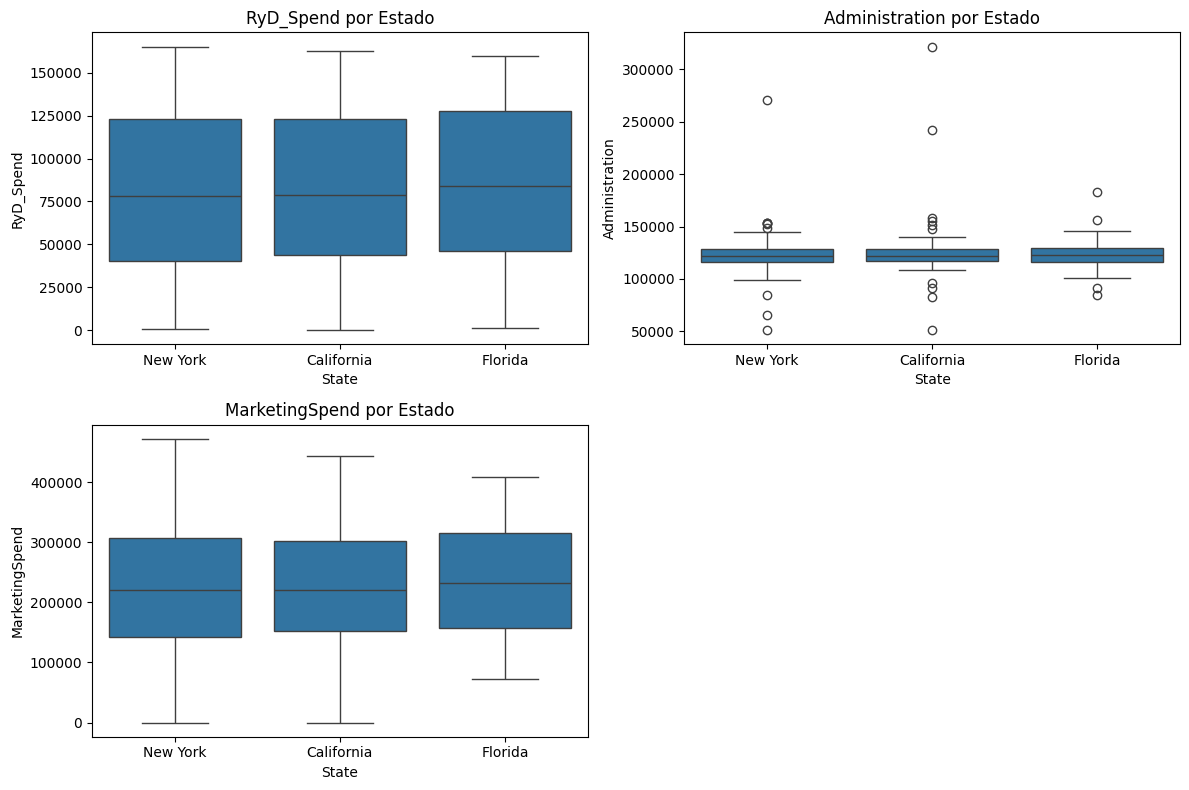

In [117]:
plt.figure(figsize=(12, 8))
for i, var in enumerate(num_vars[:-1], 1):  # sin Profit
    plt.subplot(2, 2, i)
    sns.boxplot(x='State', y=var, data=companias)
    plt.title(f'{var} por Estado')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Se puede observar que la inversión en Investigación y Desarrollo y en Marketing tiende a ser más alta en empresas ubicadas en New York, seguida por California, mientras que las empresas de Florida presentan valores más bajos en estas áreas. En cuanto al gasto en Administración, se muestra más variable y no sigue un patrón tan definido según el estado.

C:\Users\Lucas\AppData\Local\Temp\ipykernel_11584\3155018823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=companias, x='State', palette='Set1')


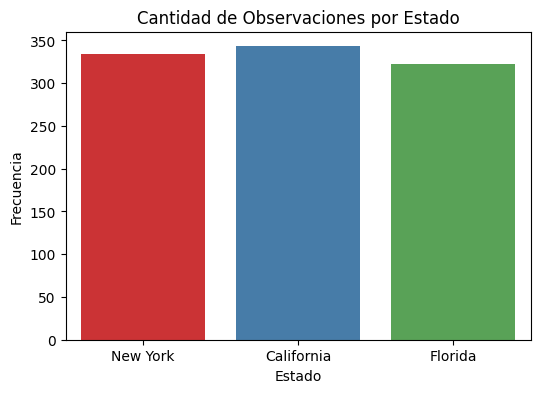

In [118]:
plt.figure(figsize=(6, 4))
sns.countplot(data=companias, x='State', palette='Set1')
plt.title('Cantidad de Observaciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')
plt.show()


Al observar el número de empresas por estado mediante un countplot, se evidencia que la cantidad de empresas es similar en los tres estados (New York, California y Florida).

## Particion de los Datos

In [119]:
# Definimos las features relevantes y la variable target
features = [
    'RyD_Spend', 'Administration', 'MarketingSpend', 'State'
]
target = 'Profit'

# Separamos en conjuntos de entrenamiento y prueba usando únicamente las features definidas (80-20)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(companias[features], companias[target], test_size=0.2, random_state=42)

# Separamos en conjuntos de entrenamiento y prueba usando únicamente las features definidas (70-30)
X_train_c2, X_test_c2, y_train_c2, y_test_c2 = train_test_split(companias[features], companias[target], test_size=0.3, random_state=42)


## Codificacion

In [120]:
# Aplicamos get_dummies a ambas particiones, asegurando que tengan las mismas columnas
X_train_codificado = pd.get_dummies(X_train_c, columns=['State'], drop_first=True)
X_test_codificado = pd.get_dummies(X_test_c, columns=['State'], drop_first=True)

# Alineamos las columnas para evitar errores en el modelo
X_train_codificado, X_test_codificado = X_train_codificado.align(X_test_codificado, join='left', axis=1, fill_value=0)


In [121]:
# Hacemos lo mismo para el de 70-30

# Aplicamos get_dummies a ambas particiones, asegurando que tengan las mismas columnas
X_train_codificado2 = pd.get_dummies(X_train_c2, columns=['State'], drop_first=True)
X_test_codificado2 = pd.get_dummies(X_test_c2, columns=['State'], drop_first=True)

# Alineamos las columnas para evitar errores en el modelo
X_train_codificado2, X_test_codificado2 = X_train_codificado2.align(X_test_codificado2, join='left', axis=1, fill_value=0)

## Escalado

In [122]:
# Columnas a escalar
columnas_a_escalar = ['RyD_Spend', 'Administration', 'MarketingSpend']

# Inicializamos el escalador
scaler = StandardScaler()

# Creamos copias para no modificar los originales
X_train_escalado = X_train_codificado.copy()
X_test_escalado = X_test_codificado.copy()

# Ajustamos y transformamos solo las columnas numéricas del entrenamiento
X_train_escalado[columnas_a_escalar] = scaler.fit_transform(X_train_escalado[columnas_a_escalar])

# Usamos el mismo escalador para transformar el test
X_test_escalado[columnas_a_escalar] = scaler.transform(X_test_escalado[columnas_a_escalar])


In [123]:
# Escalamos el segundo conjunto de datos (70-30)

# Creamos copias para no modificar los originales
X_train_escalado2 = X_train_codificado2.copy()
X_test_escalado2 = X_test_codificado2.copy()

# Ajustamos y transformamos solo las columnas numéricas del entrenamiento
X_train_escalado2[columnas_a_escalar] = scaler.fit_transform(X_train_escalado2[columnas_a_escalar])

# Usamos el mismo escalador para transformar el test
X_test_escalado2[columnas_a_escalar] = scaler.transform(X_test_escalado2[columnas_a_escalar])


# Ejercicio 2. Predicción con Arboles de Decisión

In [124]:
# Definimos el modelo de árbol de decisión para clasificación
tree_reg = DecisionTreeRegressor(random_state=13)


In [125]:
# Definimos los parametros a ajustar
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Valores de profundidad máxima
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 10],  # Número mínimo de muestras por hoja
    'criterion': ['squared_error', 'friedman_mse']  # Criterio para el cálculo del error
}

# Ajustar el modelo en el conjunto 80-20
grid_search_80_20 = GridSearchCV(estimator=tree_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_80_20.fit(X_train_escalado, y_train_c)
best_tree_reg_80_20 = grid_search_80_20.best_estimator_

# Ajustar el modelo en el conjunto 70-30
grid_search_70_30 = GridSearchCV(estimator=tree_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_70_30.fit(X_train_escalado2, y_train_c2)
best_tree_reg_70_30 = grid_search_70_30.best_estimator_

print("Mejores hiperparámetros encontrados en particion 80-20:", grid_search_80_20.best_params_) 
print("Mejores hiperparámetros encontrados en particion 70-30:", grid_search_70_30.best_params_) 


Mejores hiperparámetros encontrados en particion 80-20: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejores hiperparámetros encontrados en particion 70-30: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


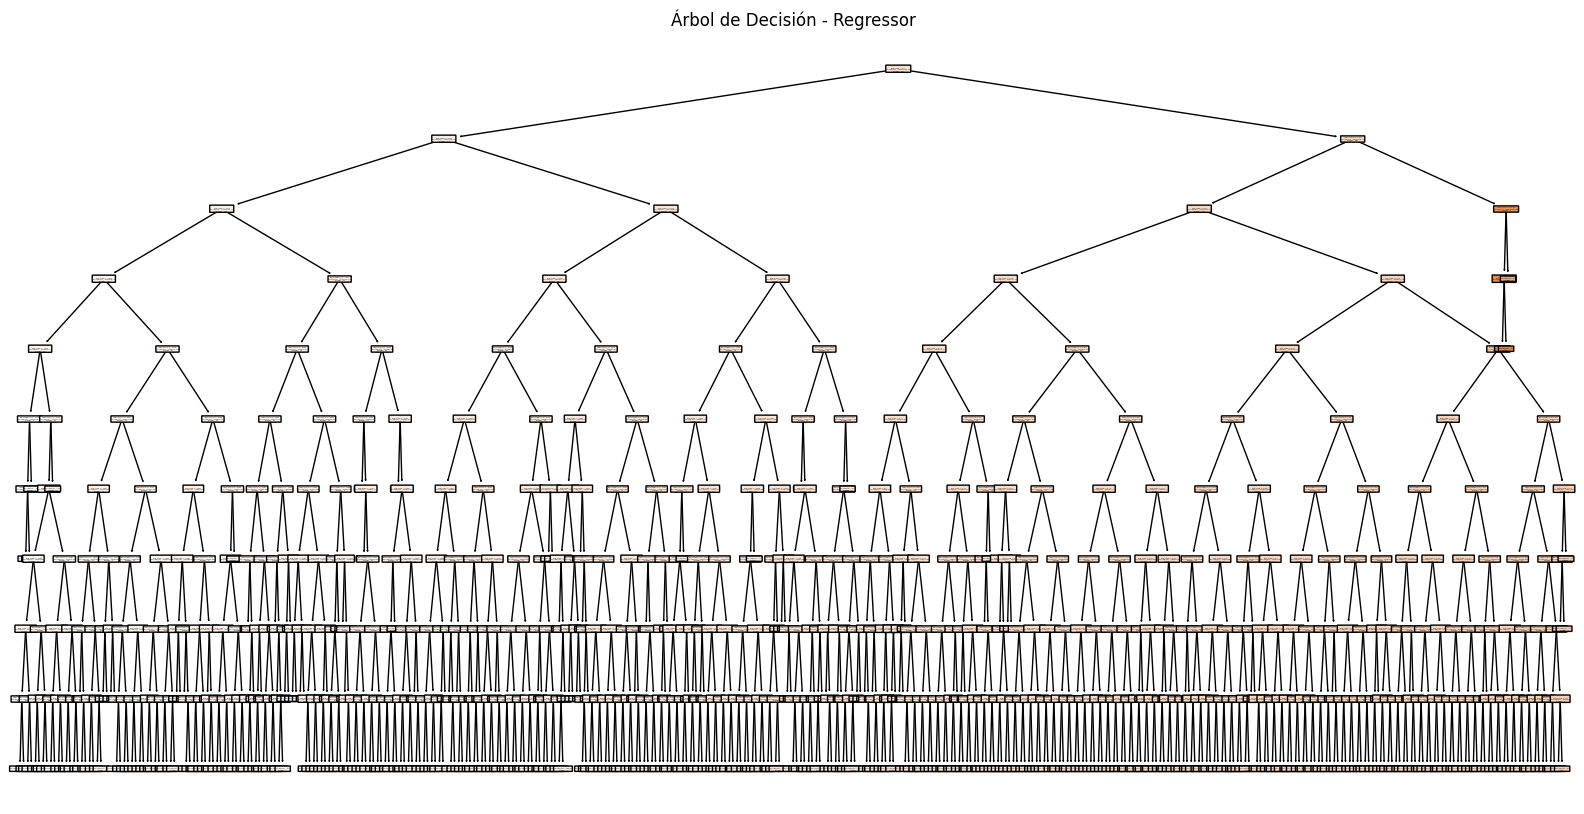

In [126]:
plt.figure(figsize=(20,10))
plot_tree(best_tree_reg_80_20, feature_names=X_train_escalado.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión - Regressor")
plt.show()

## Métricas

In [127]:
# Función para calcular y mostrar métricas
def calcular_metricas(y_true, y_pred, conjunto=""):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"===== Métricas sobre el Conjunto {conjunto} =====")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    return mae, mse, rmse

# Predicciones y métricas para el conjunto 80-20
y_pred_train = best_tree_reg_80_20.predict(X_train_escalado)
y_pred_test = best_tree_reg_80_20.predict(X_test_escalado)

# Calcular métricas para 80-20
print("===== Resultados para el Conjunto 80-20 =====")
mae_train, mse_train, rmse_train = calcular_metricas(y_train_c, y_pred_train, "ENTRENAMIENTO")
mae_test, mse_test, rmse_test = calcular_metricas(y_test_c, y_pred_test, "TEST")

print("\n")

# Predicciones y métricas para el conjunto 70-30
y_pred_train2 = best_tree_reg_70_30.predict(X_train_escalado2)
y_pred_test2 = best_tree_reg_70_30.predict(X_test_escalado2)

# Calcular métricas para 70-30
print("===== Resultados para el Conjunto 70-30 =====")
mae_train2, mse_train2, rmse_train2 = calcular_metricas(y_train_c2, y_pred_train2, "ENTRENAMIENTO")
mae_test2, mse_test2, rmse_test2 = calcular_metricas(y_test_c2, y_pred_test2, "TEST")

# Comparación de resultados
print("\n===== Comparación de Resultados =====")
print(f"Conjunto 80-20 vs Conjunto 70-30")

print(f"MAE (Entrenamiento): {mae_train:.2f} vs {mae_train2:.2f}")
print(f"MSE (Entrenamiento): {mse_train:.2f} vs {mse_train2:.2f}")
print(f"RMSE (Entrenamiento): {rmse_train:.2f} vs {rmse_train2:.2f}")

print(f"MAE (Test): {mae_test:.2f} vs {mae_test2:.2f}")
print(f"MSE (Test): {mse_test:.2f} vs {mse_test2:.2f}")
print(f"RMSE (Test): {rmse_test:.2f} vs {rmse_test2:.2f}")


===== Resultados para el Conjunto 80-20 =====
===== Métricas sobre el Conjunto ENTRENAMIENTO =====
MAE:  39.32
MSE:  6114.32
RMSE: 78.19
===== Métricas sobre el Conjunto TEST =====
MAE:  286.19
MSE:  1135508.96
RMSE: 1065.60


===== Resultados para el Conjunto 70-30 =====
===== Métricas sobre el Conjunto ENTRENAMIENTO =====
MAE:  37.32
MSE:  6251.28
RMSE: 79.07
===== Métricas sobre el Conjunto TEST =====
MAE:  455.19
MSE:  4302731.28
RMSE: 2074.30

===== Comparación de Resultados =====
Conjunto 80-20 vs Conjunto 70-30
MAE (Entrenamiento): 39.32 vs 37.32
MSE (Entrenamiento): 6114.32 vs 6251.28
RMSE (Entrenamiento): 78.19 vs 79.07
MAE (Test): 286.19 vs 455.19
MSE (Test): 1135508.96 vs 4302731.28
RMSE (Test): 1065.60 vs 2074.30


# Ejercicio N° 3 EDA Tipos de Droga

**VARIABLES**

Edad -> Edad del paciente ( en años )  
Sexo -> Sexo del paciente (F = Femenino, M = Masculino )  
BP -> Presión sanguínea ( Alto, Normal, bajo )  
Colesterol -> Nivel de colesterol del paciente ( Alto, Normal )  
Na_a_K -> Proporción de sodio en sangre.  

**TARGET**

Droga -> Tipo de droga o medicamento administrado al paciente.  

In [128]:
drogas = pd.read_csv('drugType.csv')
drogas.head()

,Edad,Sexo,BP,Colesterol,Na_a_K,Droga
0,23,F,Alto,Alto,25.355,DrogaY
1,47,M,Bajo,Alto,13.093,DrogaC
2,47,M,Bajo,Alto,10.114,DrogaC
3,28,F,Normal,Alto,7.798,DrogaX
4,61,F,Bajo,Alto,18.043,DrogaY


In [129]:
# Se puede apreciar que no hay nulos
drogas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Edad        200 non-null    int64  
 1   Sexo        200 non-null    object 
 2   BP          200 non-null    object 
 3   Colesterol  200 non-null    object 
 4   Na_a_K      200 non-null    float64
 5   Droga       200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [130]:
# No hay duplicados
drogas[drogas.duplicated() == True].sum()

Edad            0
Sexo            0
BP              0
Colesterol      0
Na_a_K        0.0
Droga           0
dtype: object

In [131]:
drogas.describe()

,Edad,Na_a_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


### Graficos

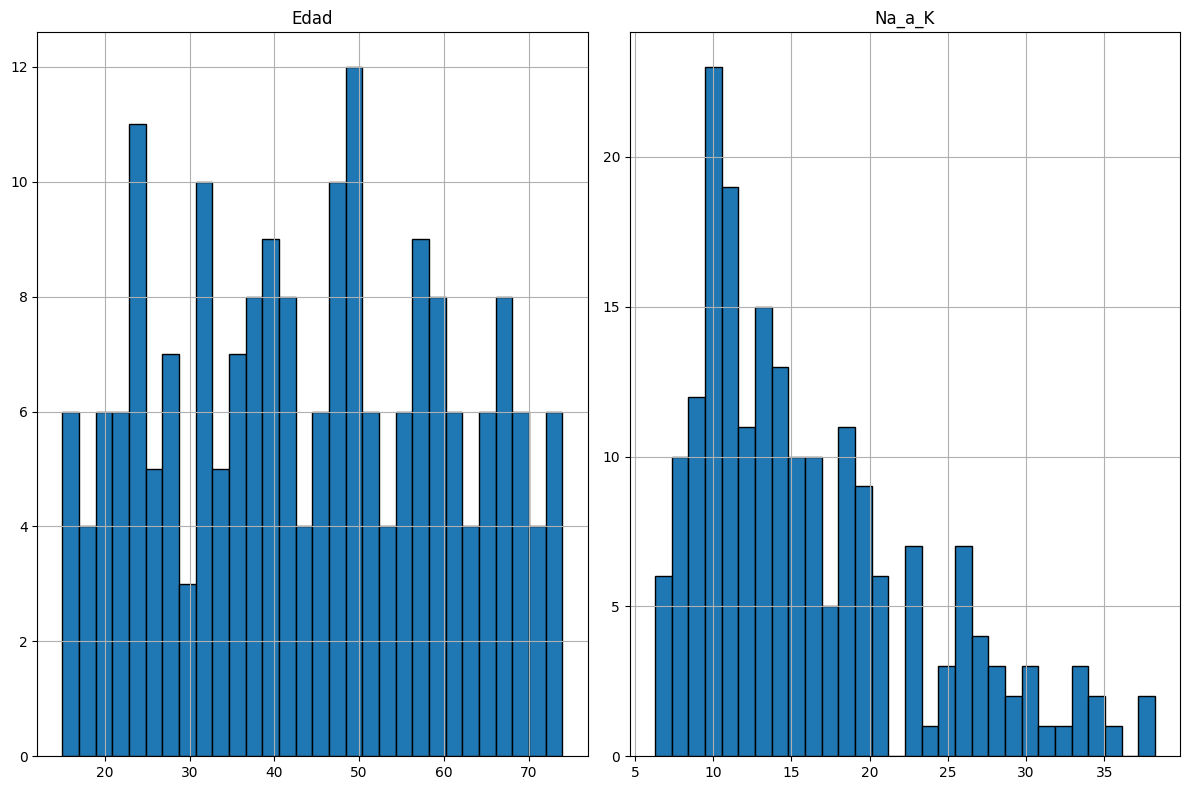

In [132]:
drogas[['Edad','Na_a_K']].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.tight_layout()
plt.show()

Los niveles de sodio, se puede apreciar que tiene una distibución asimetricca hacia la derecha.
Con respecto a edad, se puede apreciar que tiene una distribución bastante simetrica.

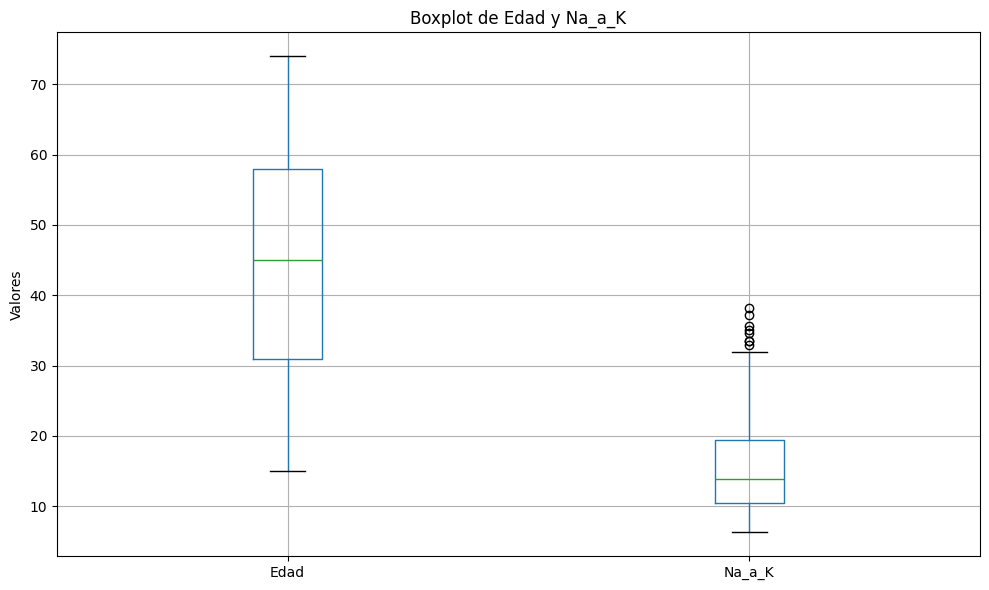

In [133]:
# Se observa que la variable Na_a_K, tiene valores atipicos
plt.figure(figsize=(10, 6)) 
drogas.boxplot()
plt.title('Boxplot de Edad y Na_a_K')
plt.ylabel('Valores')
plt.grid(True)
plt.tight_layout()
plt.show()

Con el boxplot, nos confirma hay presencia de outliers para el sodio, aunque, esta se pueda explicarse con alguna otra variable.

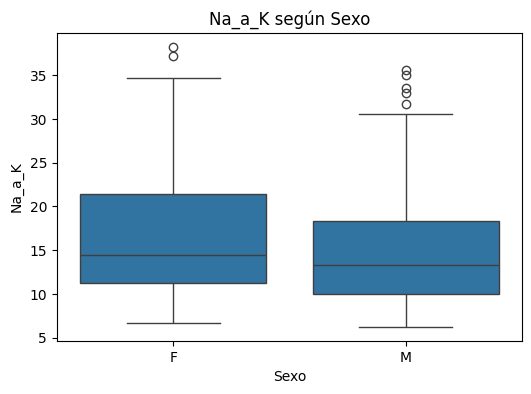

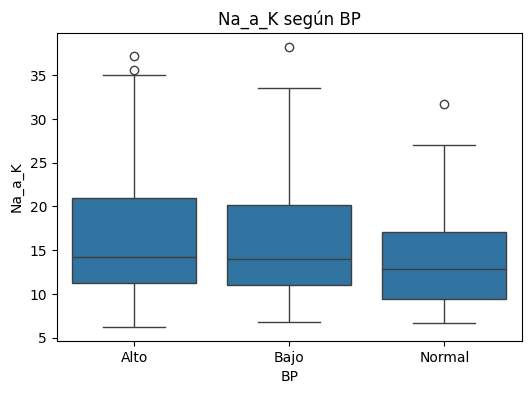

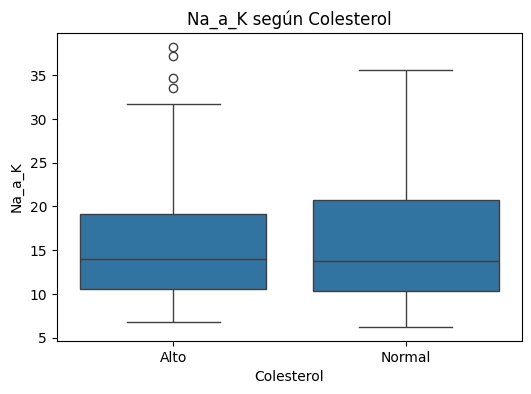

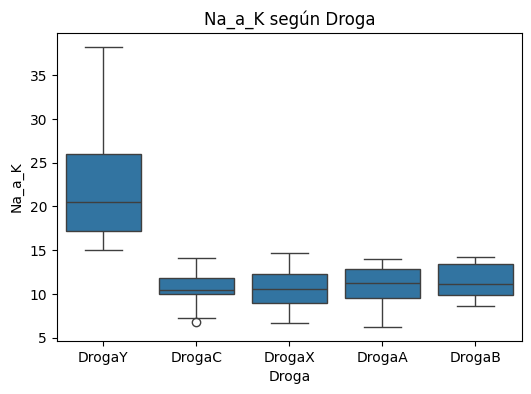

In [134]:
"""
Graficamos la relación entre las variables categóricas y la variable continua Na_a_K
Para ver si hay alguna relación entre las variables categóricas y la variable continua Na_a_K
y se puede llegar a explicar los valores atípicos de dicha variable.
"""
variables_categoricas = drogas.select_dtypes(include='object').columns
for col in variables_categoricas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=drogas, x=col, y='Na_a_K')
    plt.title(f'Na_a_K según {col}')
plt.show()

Se puede observar que Na_a_K, se puede explicar los outliers, con alguna drogra. Por lo que no se van a considerase como outliers dichos valores.

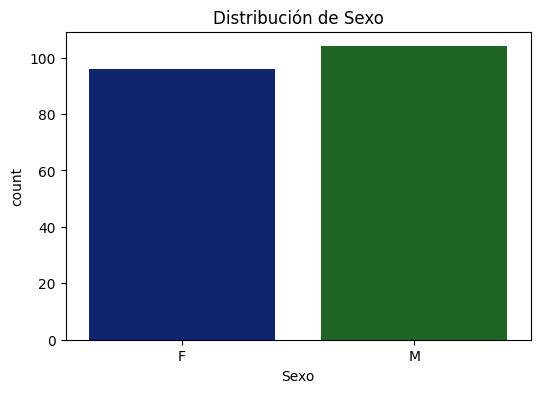

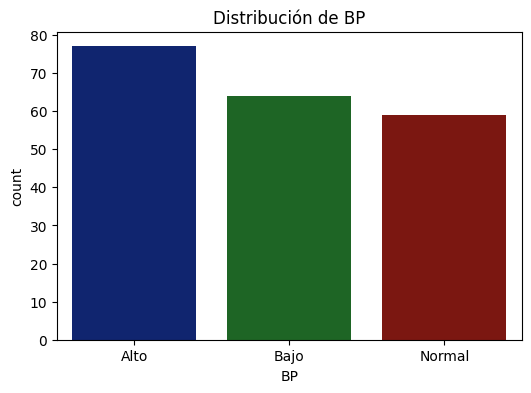

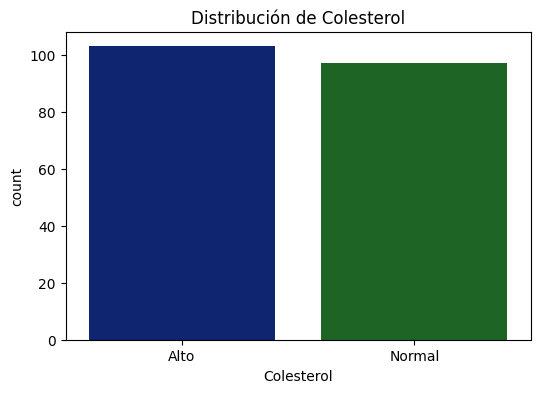

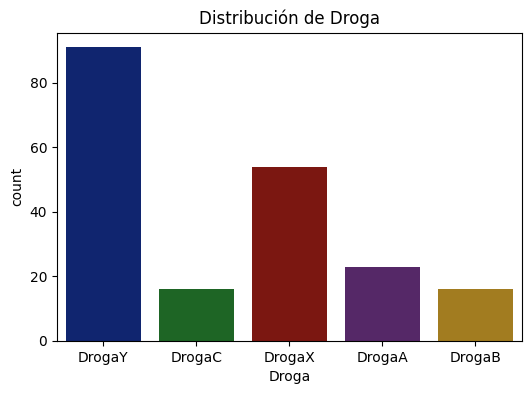

In [135]:
for col in variables_categoricas:
    plt.figure(figsize=(6, 4))
    sns.countplot(x = col, data=drogas, hue = col, palette='dark6')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
plt.show()

Se puede apreciar que las distribuciones de frecuencia de cada una de las variables categoricas, no se encuentras simetricas, como por ejemplo la variable drogra, que presenta una moda de DrograY.
Luego, con los otros graficos, poseen mas valores alto, y en el caso del sexo, hay mas casos masculinos que femeninos

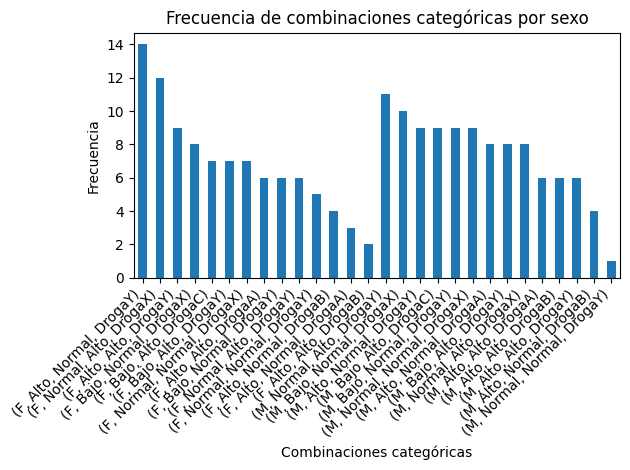

In [136]:
drogas.groupby('Sexo')[variables_categoricas].value_counts().plot(kind='bar')
plt.xlabel('Combinaciones categóricas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.title('Frecuencia de combinaciones categóricas por sexo')
plt.tight_layout()
plt.show()

A partir de este grafico, en el grafico, se puede apreciar que los valores, con el rasgo femenino, tienen una mayores valores que en el caso de los hombres, a pesar de contar con una mayor concentracion de ese genero.

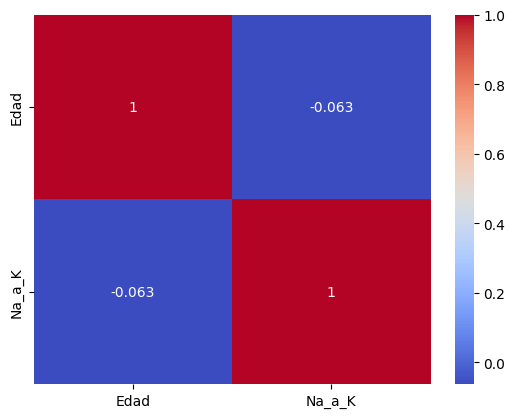

In [137]:
sns.heatmap(drogas.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

## Division del dataset

In [155]:
# Definimos las features relevantes y la variable target
features = [
    'Edad', 'Sexo', 'BP', 'Colesterol', 'Na_a_K'
]
target = 'Droga'

# Separamos en conjuntos de entrenamiento y prueba usando únicamente las features definidas (80-20)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(drogas[features], drogas[target], test_size=0.2, random_state=42)

# Separamos en conjuntos de entrenamiento y prueba usando únicamente las features definidas (70-30)
X_train_d2, X_test_d2, y_train_d2, y_test_d2 = train_test_split(drogas[features], drogas[target], test_size=0.3, random_state=42)

## Codificación

In [158]:
# Codificamos las variables categóricas
# Usamos LabelEncoder para convertir las variables categóricas en numéricas
variables_categoricas = ['Sexo', 'BP', 'Colesterol']

label_encoder = LabelEncoder()


for col in variables_categoricas:
    # Aplicamos LabelEncoder a las variables categóricas para los conjuntos de entrenamiento y test
    X_train_d[col] = label_encoder.fit_transform(X_train_d[col])
    X_test_d[col] = label_encoder.transform(X_test_d[col])  # Solo usamos transform en el test
    
    X_train_d2[col] = label_encoder.fit_transform(X_train_d2[col])
    X_test_d2[col] = label_encoder.transform(X_test_d2[col])

## Escalado

In [160]:
# Columnas a escalar
columnas_a_escalar = ['Edad', 'Na_a_K']

# Inicializamos el escalador
scaler = StandardScaler()

X_train_d[columnas_a_escalar] = scaler.fit_transform(X_train_d[columnas_a_escalar])
X_test_d[columnas_a_escalar] = scaler.transform(X_test_d[columnas_a_escalar])  # Usamos transform en el test

# Luego, escalamos las variables numéricas para el conjunto 70-30
X_train_d2[columnas_a_escalar] = scaler.fit_transform(X_train_d2[columnas_a_escalar])
X_test_d2[columnas_a_escalar] = scaler.transform(X_test_d2[columnas_a_escalar])  # Usamos transform en el test

# Ejercicio N° 4 Predicción con Arboles de Decisión

In [166]:
tree_classifier = DecisionTreeClassifier(random_state=42)

In [168]:
# Definimos los parámetros a ajustar para clasificación
param_grid_classifier = {
    'max_depth': [3, 5, 7, 10, None],  # Valores de profundidad máxima
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 10],  # Número mínimo de muestras por hoja
    'criterion': ['gini', 'entropy']  # Criterio para el cálculo del error en clasificación
}


# Ajustar el modelo en el conjunto 80-20
grid_search_80_20_class = GridSearchCV(estimator=tree_classifier, param_grid=param_grid_classifier, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_80_20_class.fit(X_train_d, y_train_d)
best_tree_classifier_80_20 = grid_search_80_20_class.best_estimator_

# Ajustar el modelo en el conjunto 70-30
grid_search_70_30_class = GridSearchCV(estimator=tree_classifier, param_grid=param_grid_classifier, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_70_30_class.fit(X_train_d2, y_train_d2)
best_tree_classifier_70_30 = grid_search_70_30_class.best_estimator_

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados en partición 80-20:", grid_search_80_20_class.best_params_)
print("Mejores hiperparámetros encontrados en partición 70-30:", grid_search_70_30_class.best_params_)


Mejores hiperparámetros encontrados en partición 80-20: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejores hiperparámetros encontrados en partición 70-30: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


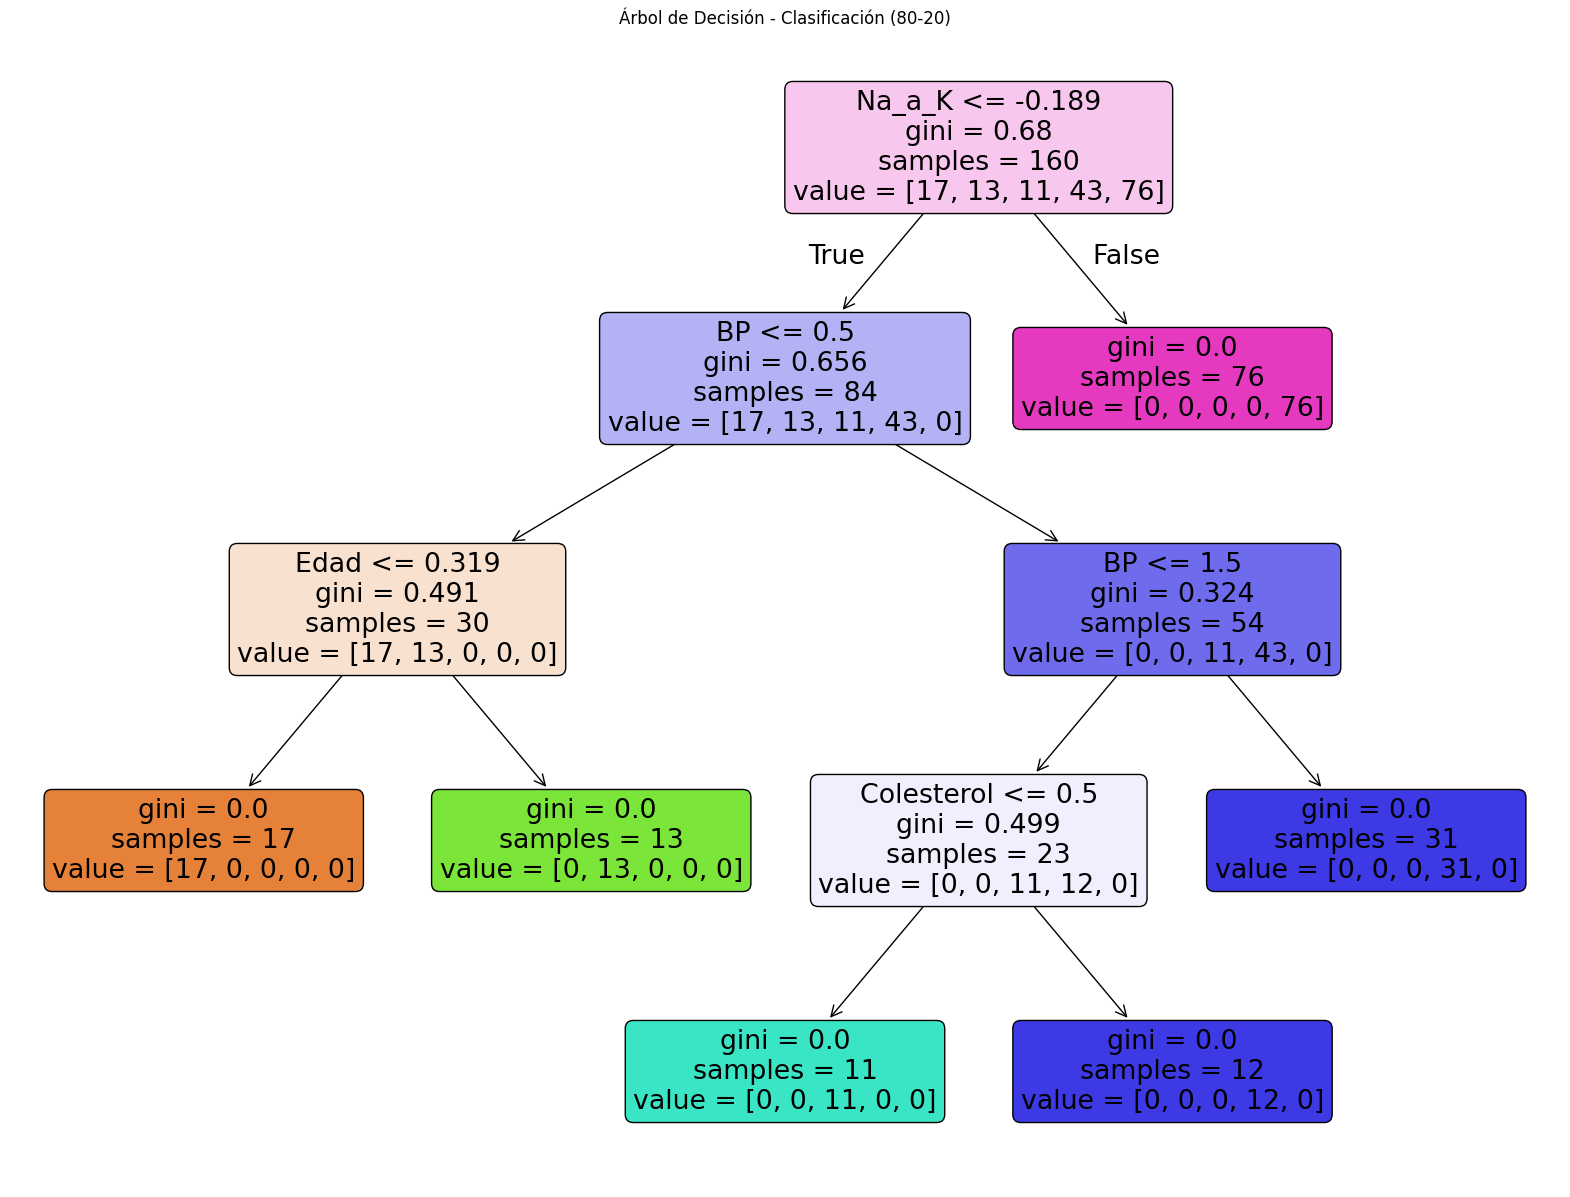

In [172]:
# Graficamos el árbol de decisión para clasificación con los mejores hiperparámetros encontrados (80-20)
plt.figure(figsize=(20,15))
plot_tree(best_tree_classifier_80_20, feature_names=X_train_d.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión - Clasificación (80-20)")
plt.show()

### Evaluación de las metricas antes de la poda

In [174]:
# Hacemos la predicción en el conjunto de test (80-20)
y_test_pred = best_tree_classifier_80_20.predict(X_test_d)

# Evaluación del árbol de decisión con el conjunto de test (80-20)
print("=== Evaluación del árbol de decisión (80-20) ===")
print("Exactitud (Accuracy):", accuracy_score(y_test_d, y_test_pred))
print("Precisión macro:", precision_score(y_test_d, y_test_pred, average='macro', zero_division=1))
print("Exhaustividad (Recall) macro:", recall_score(y_test_d, y_test_pred, average='macro', zero_division=1))


=== Evaluación del árbol de decisión (80-20) ===
Exactitud (Accuracy): 1.0
Precisión macro: 1.0
Exhaustividad (Recall) macro: 1.0


#### Matriz de confusión

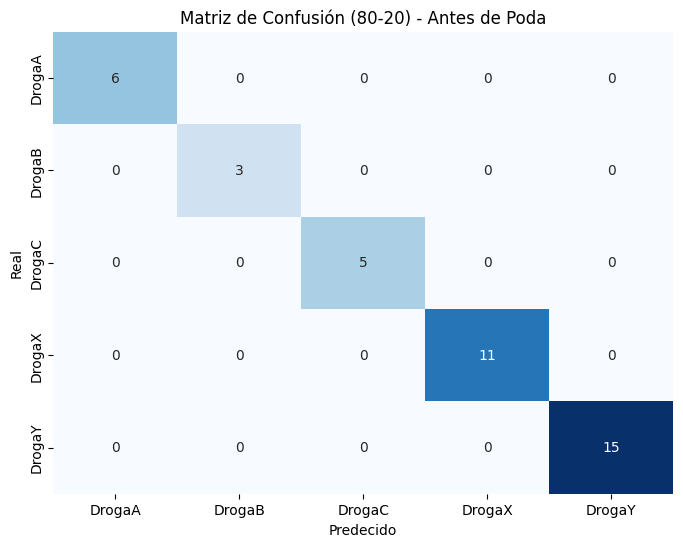

In [177]:
confusion = confusion_matrix(y_test_d, y_test_pred)
etiquetas = ['DrogaA', 'DrogaB', 'DrogaC', 'DrogaX', 'DrogaY']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=etiquetas, yticklabels=etiquetas, cbar=False)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión (80-20) - Antes de Poda')
plt.show()

### Aplicamos la Poda

In [183]:
# **Poda del árbol**: Aplicamos poda limitando la profundidad máxima del árbol a un valor
best_tree_classifier_80_20_poda = DecisionTreeClassifier(
    max_depth=5,  # Limitar la profundidad máxima del árbol
    min_samples_split=5,  # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4,  # Mínimo de muestras por hoja
    criterion='gini',  # O 'entropy', según lo mejor encontrado
    random_state=42
)


In [184]:
# Entrenamos el árbol podado con los datos de entrenamiento (80-20)
best_tree_classifier_80_20_poda.fit(X_train_d, y_train_d)

# Evaluar el modelo podado en el conjunto de test (80-20)
y_test_pred_poda = best_tree_classifier_80_20_poda.predict(X_test_d)

In [185]:
# Evaluación del árbol de decisión podado
print("=== Evaluación del árbol de decisión podado (80-20) ===")
print("Exactitud (Accuracy):", accuracy_score(y_test_d, y_test_pred_poda))
print("Precisión macro:", precision_score(y_test_d, y_test_pred_poda, average='macro', zero_division=1))
print("Exhaustividad (Recall) macro:", recall_score(y_test_d, y_test_pred_poda, average='macro', zero_division=1))

=== Evaluación del árbol de decisión podado (80-20) ===
Exactitud (Accuracy): 1.0
Precisión macro: 1.0
Exhaustividad (Recall) macro: 1.0


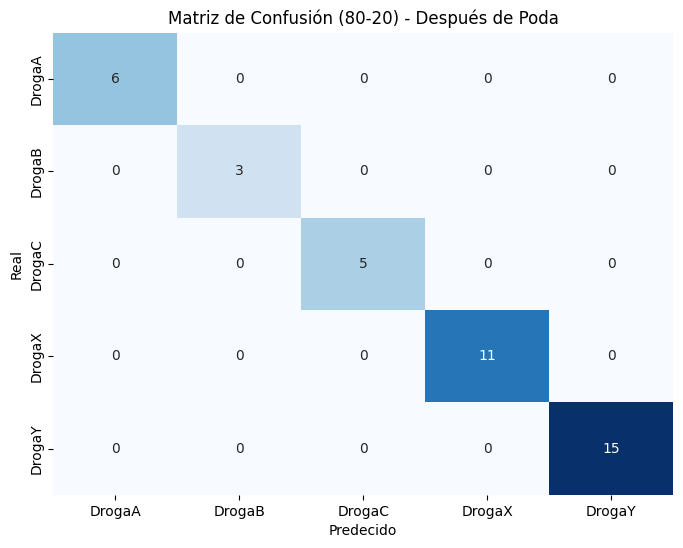

In [186]:
# Matriz de confusión para el árbol podado
confusion_poda = confusion_matrix(y_test_d, y_test_pred_poda)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_poda, annot=True, fmt='d', cmap='Blues',
            xticklabels=etiquetas, yticklabels=etiquetas, cbar=False)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión (80-20) - Después de Poda')
plt.show()

#### Visualización del árbol podado

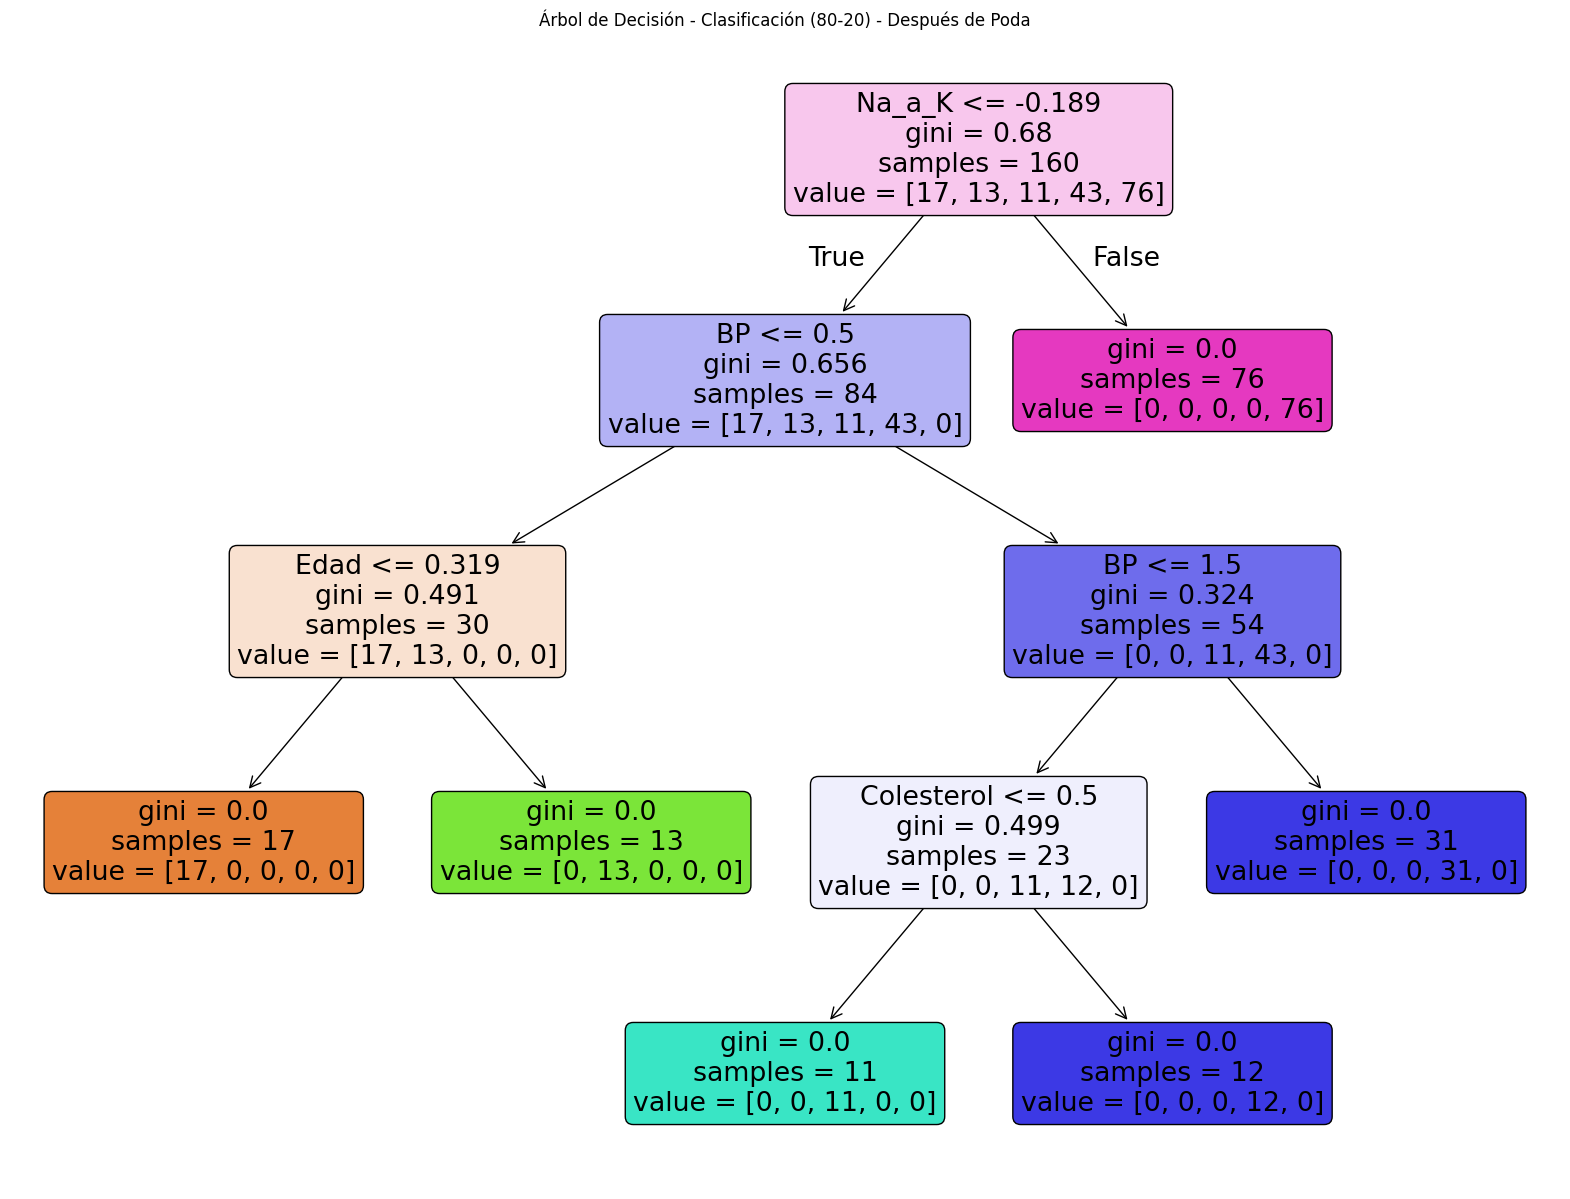

In [182]:
# Graficamos el árbol podado
plt.figure(figsize=(20, 15))
plot_tree(best_tree_classifier_80_20_poda, feature_names=X_train_d.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión - Clasificación (80-20) - Después de Poda")
plt.show()


# Ejercicio 5